In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: worked with Jessica Houghton

In [132]:
colnames = ['Subject_id', 'Year', 'Antiseptic', 'Limb', 'Outcome']

In [133]:
data = pd.read_csv("lister.dat.txt", names = colnames, delim_whitespace=True)

### Part a

In [134]:
def lowerlimb_survival(df, print_val = False):
    lowerlimb = df[df["Limb"] == 1]
    pre_antiseptic = lowerlimb[lowerlimb["Antiseptic"] == 0]
    post_antiseptic = lowerlimb[lowerlimb["Antiseptic"] == 1]
    survival_pre = np.sum(pre_antiseptic["Outcome"])/pre_antiseptic.shape[0]
    survival_post = np.sum(post_antiseptic["Outcome"])/post_antiseptic.shape[0]
    if print_val:
        print("The survival rate for lower limb amputations in pre-antiseptic periods" + 
              " is = {}".format(survival_pre))
        print("The survival rate for lower limb amputations in post-antiseptic periods" + 
              " is = {}".format(survival_post))
        print("Delta (post_rate - pre_rate) is = {}".format(survival_post - survival_pre))
    return survival_post - survival_pre

In [135]:
OG_survival = lowerlimb_survival(data, True)
OG_survival;

The survival rate for lower limb amputations in pre-antiseptic periods is = 0.5
The survival rate for lower limb amputations in post-antiseptic periods is = 0.9166666666666666
Delta (post_rate - pre_rate) is = 0.41666666666666663


### Part b

In [190]:
data_limb = data[data["Limb"] == 1]

In [191]:
deltas = np.array([])
for i in np.arange(9999):
    permute = np.random.permutation(data_limb['Antiseptic'])
    permuted_data = data_limb.drop(['Antiseptic'], axis = 1)
    permuted_data['Antiseptic'] = permute
    deltas = np.append(deltas, lowerlimb_survival(permuted_data))

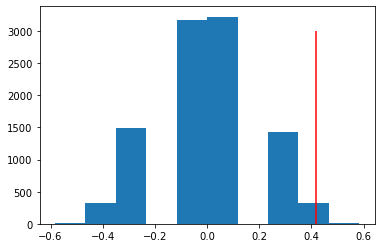

In [192]:
plt.vlines(OG_survival, 0, 3000, colors = 'red')
plt.hist(deltas);

In [193]:
B = 9999

In [194]:
#get one sided p-value
num = 1 + np.sum(deltas >= OG_survival)
denom = 1 + B
print("One sided p-value is = {}".format(num/denom))

One sided p-value is = 0.0349


In [195]:
#get two sided p-value
num = 1 + np.sum(np.abs(deltas) >= np.abs(OG_survival))
denom = 1 + B
print("Two sided p-value is = {}".format(num/denom))

Two sided p-value is = 0.0687


In [189]:
print("There would be {} (2^{}) permutations in this example. This is because the length of our \
lower-limb matrix is {} and each spot has two options (1 or 0)."
      .format(2**(data_limb.shape[0]), data_limb.shape[0], data_limb.shape[0]))

There would be 16777216 (2^24) permutations in this example. This is because the length of our lower-limb matrix is 24 and each spot has two options (1 or 0).


### Part C 

In [145]:
data_subset = data[data["Limb"] == 1]

In [146]:
# chi-squared test
data_crosstab = pd.crosstab(data_subset['Antiseptic'],
                            data_subset['Outcome'], 
                               margins = False)
chi2, p, dof, ex = chi2_contingency(data_crosstab)
print("Our chi squared p-value is = {}".format(p))

Our chi squared p-value is = 0.07243809925044642


### Part D

Violates SUTVA assumption that for each unit, there are no different forms or versions of each treatment level, which lead to different potential outcomes. The Antiseptic column in the data table is simply binary for Antiseptic period or not antiseptic period. The column doesn't actually indicate whether an antiseptic was used. If there were an antiseptic used, it doesn't indicate the dosage, type, or for how long. Additionally, there is a variety in skill set and equipment used by each doctor. Lastly, the study is time dependent as it varies from 1864 to 1869 (pre and post antiseptic era). There could have been a variety of technological advancements made during that which are not related to antiseptics. Thus, there could be confounding factors that lowered the mortality rate in lower leg amputees. 

## Question 3 (did the original vesion of the question)

In [198]:
alpha = beta = 0.001
n = 10000
theta0 = 0.01
theta1 = 0.02

In [199]:
def LLR(data, n, theta0, theta1):
    return data * np.log((theta1*(1 - theta0))/(theta0*(1 - theta1))) + n \
        * np.log((1 - theta1)/(1 - theta0))

In [200]:
def SPRT(n, true_theta, alpha, beta):
    data = 0
    h1_accept = False
    for i in np.arange(1, n+1):
        llr = LLR(data, i, 0.01, 0.02)
        if llr >= np.log((1 - beta)/alpha):
            h1_accept = True
            return i, h1_accept
        elif llr <= np.log(beta/(1 - alpha)):
            return i, h1_accept
        data += np.random.binomial(1, true_theta)
    return n, h1_accept

In [201]:
time = np.array([])
h1_correct = 0 
for i in np.arange(1000):
    sprt = SPRT(10000, 0.02, alpha, beta)
    time = np.append(time, sprt[0])
    h1_correct += int(sprt[1])
error_count = 1000 - h1_correct

### Part B

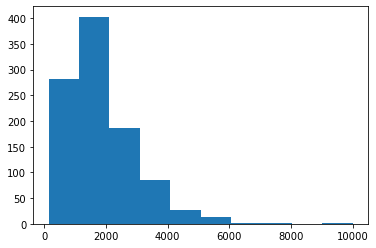

In [202]:
plt.hist(time);

In [203]:
print("The number of errors when the true theta = {} is and alpha = beta = {} is {}.".format(0.02, alpha, error_count))

The number of errors when the true theta = 0.02 is and alpha = beta = 0.001 is 1.


### Part C

In [204]:
alpha = beta = 0.05
time = np.array([])
h1_correct = 0 
for i in np.arange(1000):
    sprt = SPRT(10000, 0.02, alpha, beta)
    time = np.append(time, sprt[0])
    h1_correct += int(sprt[1])
error_count = 1000 - h1_correct

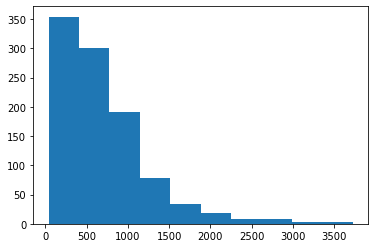

In [205]:
plt.hist(time);

In [206]:
print("The number of errors when the true theta = {} is and alpha = beta = {} is {}.".format(0.02, alpha, error_count))

The number of errors when the true theta = 0.02 is and alpha = beta = 0.05 is 52.


### Part D

In [207]:
alpha = beta = 0.001
time = np.array([])
h1_picked = 0 
for i in np.arange(1000):
    sprt = SPRT(10000, 0.015, alpha, beta)
    time = np.append(time, sprt[0])
    h1_picked += int(sprt[1])
h0_picked = 1000 - h1_picked

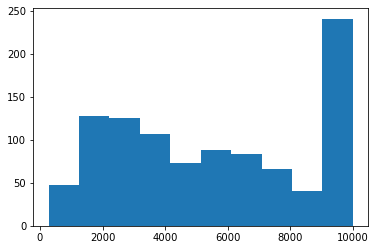

In [208]:
plt.hist(time);

In [209]:
print("The number of times SPRT picked h1 = {} and h0 = {} when alpha = beta = {} and \
the true theta = {}.".format(h1_picked, h0_picked, alpha, 0.015))

The number of times SPRT picked h1 = 531 and h0 = 469 when alpha = beta = 0.001 and the true theta = 0.015.
